# What Makes a Successful Book-to-Film Adaptation?

**Authors:** Bruno Fernandes Iorio, Beeverly Gourdette  

In [2]:
# Import libraries
%load_ext autoreload
%autoreload 2
from src.data_collection import normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_collection import *
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, silhouette_score,
    mean_squared_error, mean_absolute_error, r2_score
)
import ast
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Data Loading & Exploration

In [208]:
df, df_books, df_authors = collect_df('data/raw/movie_adaptation_list.csv','data/raw/books_data_bis.json','data/raw/authors_data.json')

### Books EDA 

In [210]:
df_books

,description,title,genres,ratings_count,book_id,series,awards,ratinghistogram,author_id,publish_date,reviews_count,adaptation_ids,adapted
0,Harry Potter is an ordinary boy who lives in a cupboard under the stairs at his Aunt Petunia and...,Harry Potter and the Philosopher's Stone,"[Fiction, Magic, Adventure, Young Adult, Middle Grade, Science Fiction Fantasy, Classics, Novels...",9555341.0,975442,[Harry Potter],"[{'awardedAt': 1199174400000, 'hasWon': None, 'name': 'Mythopoeic Fantasy Award', 'category': 'C...","[163560, 185911, 809700, 2204456, 6191714]",1077326.J_K_Rowling,1997-06-26 07:00:00,153644.0,"[1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917]",1
1,Harry Potter has no idea how famous he is. That's because he's being raised by his miserable aun...,Harry Potter and the Sorcerer's Stone,"[Fiction, Magic, Adventure, Young Adult, Middle Grade, Science Fiction Fantasy, Classics, Novels...",9554771.0,949563,[Harry Potter],"[{'awardedAt': 1199174400000, 'hasWon': None, 'name': 'Mythopoeic Fantasy Award', 'category': 'C...","[163552, 185904, 809666, 2204289, 6191360]",1077326.J_K_Rowling,1998-01-01 08:00:00,153628.0,"[1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917]",1
2,1,Harry Potter and the Philosopher's Stone,"[Fiction, Magic, Adventure, Young Adult, Middle Grade, Science Fiction Fantasy, Classics, Novels...",9551536.0,818060,[Harry Potter],"[{'awardedAt': 1199174400000, 'hasWon': None, 'name': 'Mythopoeic Fantasy Award', 'category': 'C...","[163492, 185847, 809393, 2203466, 6189338]",43444320.CALOTO,2004-10-04 07:00:00,153539.0,"[1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917]",1
3,"About three things I was absolutely positive.First, Edward was a vampire.Second, there was a par...",Twilight,"[Fantasy, Young Adult, Vampires, Paranormal Romance, Supernatural, Romance, Urban Fantasy, Teen,...",6301638.0,1035885,[The Twilight Saga],"[{'awardedAt': 1167638400000, 'hasWon': None, 'name': 'Georgia Peach Book Award', 'category': ''...","[627048, 656107, 1306082, 1456833, 2255568]",941441.Stephenie_Meyer,2005-01-01 08:00:00,125790.0,"[3353, 3354, 3355, 3356, 3357, 3354, 3355, 3356, 3357]",1
4,"""When he was nearly thirteen, my brother Jem got his arm badly broken at the elbow.... When enou...",To Kill a Mockingbird,"[Fiction, Historical, School, Young Adult, Literature, Read For School, Classics, Novels, High S...",5844866.0,988811,[To Kill a Mockingbird],"[{'awardedAt': -283968000000, 'hasWon': None, 'name': 'Pulitzer Prize', 'category': 'Fiction'}, ...","[108151, 201046, 762227, 1736848, 3036594]",1825.Harper_Lee,1960-07-11 08:00:00,113404.0,"[3283, 3283]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115622,None,A Century of Kings: 1873 1972,[Fiction],1.0,978061,None,None,"[0, 0, 0, 1, 0]",493333.L_P_Wilkinson,1980-01-01 08:00:00,NaN,[],0
115623,"contains: Wampeters, Foma &amp; Granfalloons (1st printing), Breakfast of Champions (1st printin...",The Vonnegut Quartet,[Fiction],0.0,39945,None,None,"[0, 0, 0, 0, 0]",2778055.Kurt_Vonnegut_Jr_,1982-10-01 07:00:00,NaN,[],0
115624,"Nouveau Press, MS, 1894, hardcover. First Editions were limited to 340 signed copies on colophon...",Nothing is Lost Save Honor,[Fiction],0.0,447838,None,None,"[0, 0, 0, 0, 0]",2778055.Kurt_Vonnegut_Jr_,1984-12-01 08:00:00,NaN,[],0
115625,"Book by White, E. B.",Louie the Hero,"[Fiction, Juvenile]",0.0,285553,None,None,"[0, 0, 0, 0, 0]",74863.Lin_Oliver,2002-08-28 07:00:00,NaN,[],0


In [214]:
df_books.describe()

,ratings_count,publish_date,reviews_count,adapted
count,1.156270e+05,114727,114861.000000,115627.000000
mean,1.643869e+04,1996-01-12 18:06:45.166471936,585.689512,0.039714
min,0.000000e+00,1683-01-01 08:00:00,1.000000,0.000000
25%,1.660000e+02,1991-03-01 08:00:00,15.000000,0.000000
50%,5.890000e+02,1999-09-21 07:00:00,44.000000,0.000000
75%,2.698000e+03,2004-08-17 19:00:00,164.000000,0.000000
max,9.555341e+06,2222-01-01 08:00:00,153644.000000,1.000000
std,1.405662e+05,NaN,3667.519956,0.195287


adapted
0    111035
1      4592
Name: count, dtype: int64


<Axes: title={'center': 'adapted'}, xlabel='adapted'>

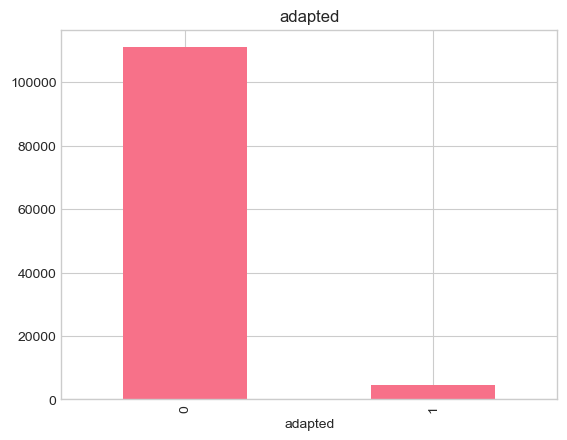

In [218]:
print(df_books['adapted'].value_counts())
df_books['adapted'].value_counts().plot(kind='bar', title ="adapted")
# some were lost : 4592/5911 (in df)

In [212]:
# --  Exemple : tous les films de Stephen King
author = normalize("Stephen  king")
author_films = df[df['author_book'].apply(normalize) == author]
author_films[['book', 'film', 'date_film']]

,book,film,date_film
568,Carrie,Carrie,1976-11-03
569,Carrie,The Rage: Carrie 2,1998
570,Carrie,Carrie,2002-11-04
571,Carrie,Carrie,1976-11-03
586,Cell,Cell,2016-07-06
614,Christine,Christine,1983-12-09
730,Cycle of the Werewolf,Silver Bullet,1985-10-10
758,The Dark Tower,The Dark Tower,2017-08-03
781,The Dead Zone,The Dead Zone,1983-10-21
896,Doctor Sleep,Doctor Sleep,2019-10-30


# 2. 

In [133]:
df_books

,num_pages,link,description,language,thumbnail_url,isbn_10,title,titlecomplete,createdAt,characters,...,ratinghistogram,publisher,edition_unique_id,asin,author_id,publish_date,reviews_count,id,adaptation_ids,adapted
0,263.0,https://images-na.ssl-images-amazon.com/images...,"Dee, una joven historiadora del arte, descubre...",Spanish; Castilian,https://images-na.ssl-images-amazon.com/images...,8401499577,El escándalo Modigliani,El escándalo Modigliani,1.697573e+09,None,...,"[471, 1787, 4870, 3292, 1588]",Plaza & Janes Editories Sa,41228,8401499577,3447.Ken_Follett,5.680224e+11,653.0,NaN,[],0
1,NaN,https://images-na.ssl-images-amazon.com/images...,Infant and children's health can be improved b...,English,https://images-na.ssl-images-amazon.com/images...,0615114857,The Best-Kept Secret to Raising a Healthy Chil...,The Best-Kept Secret to Raising a Healthy Chil...,1.697573e+09,None,...,"[0, 0, 0, 0, 0]",Specific Chiopractic,485197,0615114857,277216.Tracey_Mulhall_Wehrenberg,9.677916e+11,NaN,NaN,[],0
2,319.0,https://images-na.ssl-images-amazon.com/images...,"En el año 1944, los aliados preparan en secret...",Spanish; Castilian,https://images-na.ssl-images-amazon.com/images...,8401499542,La isla de las tormentas,La isla de las tormentas,1.697573e+09,"[Lucy Rose, Henry Faber]",...,"[1279, 3395, 23486, 60067, 64705]","Plaza & Janés Editores, Colección Jet / Biblio...",395229,8401499542,3447.Ken_Follett,8.836416e+11,3898.0,NaN,[],0
3,224.0,https://images-na.ssl-images-amazon.com/images...,Esta magnifica novela explora las corruptas in...,Spanish; Castilian,https://images-na.ssl-images-amazon.com/images...,8401499593,Papel Moneda,Papel Moneda (Spanish Edition),1.697573e+09,"[Tony Cox, Felix Laski]",...,"[356, 1315, 3894, 2903, 1377]",PLAZAANE,745689,8401499593,22001338.Ken_Follet,NaN,499.0,NaN,[],0
4,410.0,https://images-na.ssl-images-amazon.com/images...,Revenge is the engine which powers Sanford's s...,English,https://images-na.ssl-images-amazon.com/images...,0747256071,Sudden Prey,"Sudden Prey (Lucas Davenport, #8)",1.697573e+09,"[Sloan (Eyes of Prey), Sell-More Green, The do...",...,"[128, 359, 3281, 9420, 8505]",Headline Book Publishing,1520707,0747256071,4610.John_Sandford,8.521056e+11,623.0,NaN,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385044,232.0,https://images-na.ssl-images-amazon.com/images...,In the first major study of representations of...,English,https://images-na.ssl-images-amazon.com/images...,131713270X,"French Crime Fiction, 1945-2005: Investigating...","French Crime Fiction, 1945-2005: Investigating...",NaN,None,...,"[0, 0, 0, 1, 0]",Routledge,24467067,131713270X,269089,1.461308e+12,NaN,NaN,[],0
1385045,232.0,https://images-na.ssl-images-amazon.com/images...,In the first major study of representations of...,English,https://images-na.ssl-images-amazon.com/images...,1317132688,"French Crime Fiction, 1945-2005: Investigating...","French Crime Fiction, 1945-2005: Investigating...",NaN,None,...,"[0, 0, 0, 1, 0]",Routledge,24467067,1317132688,269089,1.461308e+12,NaN,NaN,[],0
1385046,282.0,https://images-na.ssl-images-amazon.com/images...,Focusing on the Dominican Order's activities i...,English,https://images-na.ssl-images-amazon.com/images...,1317132629,Friars on the Frontier: Catholic Renewal and t...,Friars on the Frontier: Catholic Renewal and t...,NaN,None,...,"[0, 1, 0, 1, 0]",Routledge,23244759,1317132629,4477846,1.460704e+12,NaN,NaN,[],0
1385047,282.0,https://images-na.ssl-images-amazon.com/images...,Focusing on the Dominican Order's activities i...,English,https://images-na.ssl-images-amazon.com/images...,1317132637,Friars on the Frontier: Catholic Renewal and t...,Friars on the Frontier: Catholic Renewal and t...,NaN,None,...,"[0, 1, 0, 1, 0]",Routledge,23244759,1317132637,4477846,1.460704e+12,NaN,NaN,[],0
